# Distance Measures
Measure of dissimilarity between two points.

### Questions to ask before distances.
What data do we have? (Discrete/Continuous)

How do measure similarity between two points? (Distance Measures)

What patterns are seen in data before applying any algorithm? (EDA)

## Calculate Distance Measures and EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import and view the dataset

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
display(data.head(10),data.tail())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


Generate the statistical summary


In [4]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Scatter plot

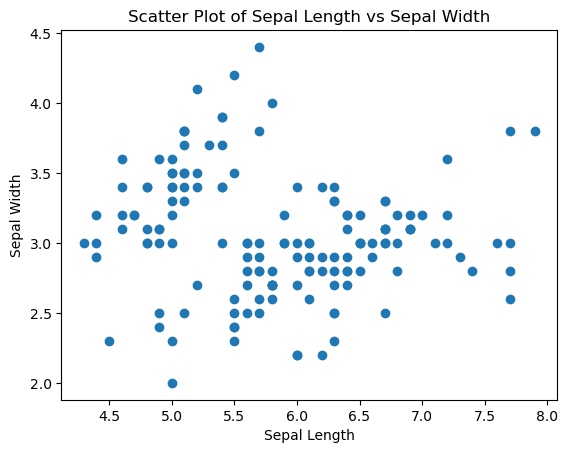

In [5]:
plt.figure()
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()

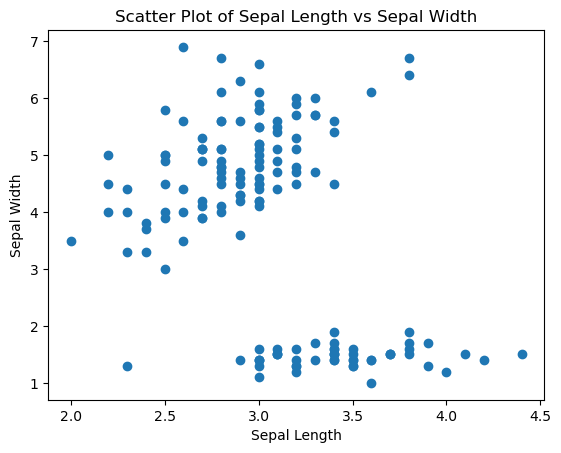

In [6]:
plt.figure()
plt.scatter(data['sepal width (cm)'], data['petal length (cm)'])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()

Histogram of dataset

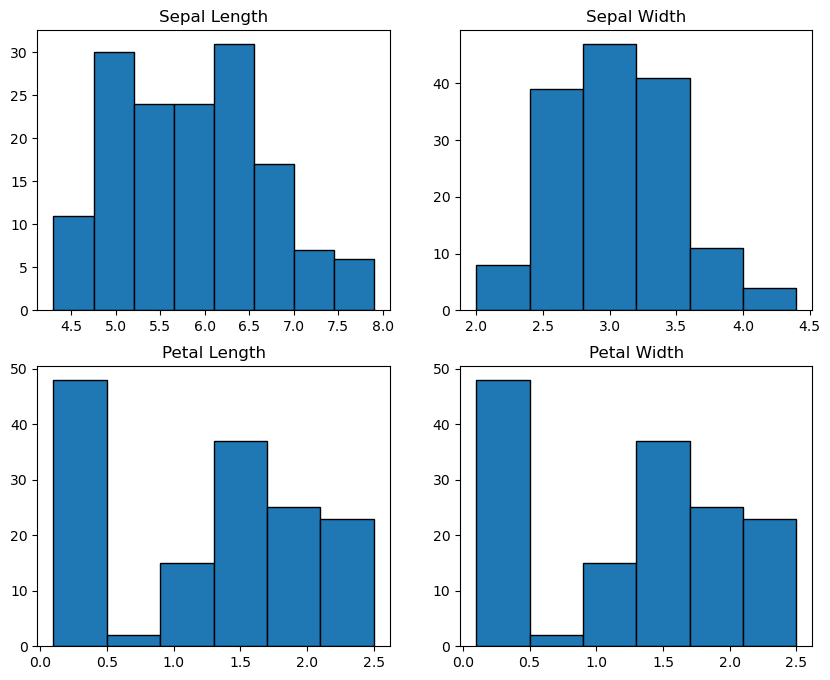

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


None

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0,0].hist(data['sepal length (cm)'], bins = 8, edgecolor = 'black')
axs[0,0].set_title('Sepal Length')
axs[0,1].hist(data['sepal width (cm)'], bins = 6, edgecolor = 'black')
axs[0,1].set_title('Sepal Width')
axs[1,0].hist(data['petal width (cm)'], bins = 6, edgecolor = 'black')
axs[1,0].set_title('Petal Length')
axs[1,1].hist(data['petal width (cm)'], bins = 6, edgecolor = 'black')
axs[1,1].set_title('Petal Width')

display(data.head(),plt.show())

Pairplot of dataset

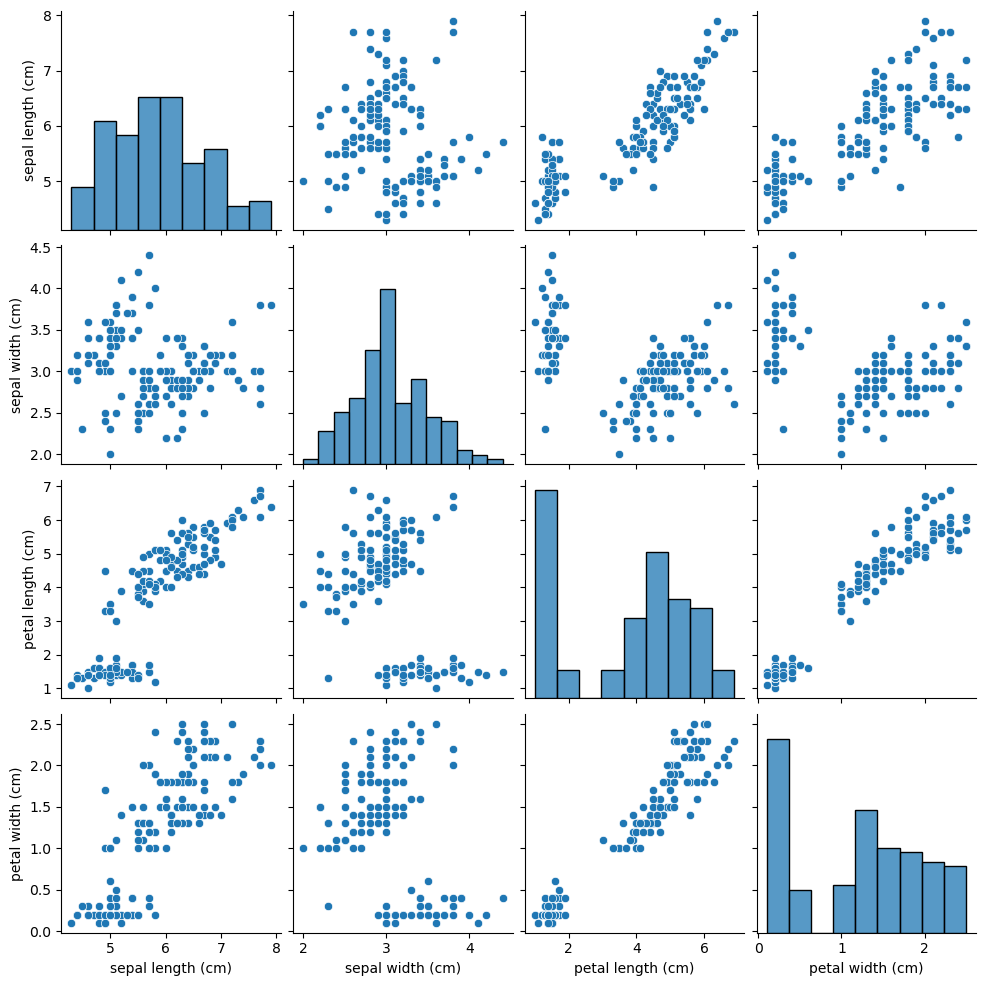

In [8]:
sns.pairplot(data)

## Measures of Distance in Python EDA

In [9]:
from sklearn.preprocessing import StandardScaler
standard_data = StandardScaler().fit_transform(data)

from sklearn.preprocessing import MinMaxScaler
minmax_data = MinMaxScaler().fit_transform(data)

#### Euclidian Distance

In [10]:
import pandas as pd
import numpy as np

# Define the function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# 1. Prepare all datasets as DataFrames for consistency
df_raw = pd.DataFrame(data)
df_std = pd.DataFrame(standard_data)
df_mmx = pd.DataFrame(minmax_data)

# 2. Define references specific to each dataset (Row 0)
ref_raw = df_raw.iloc[0].values
ref_std = df_std.iloc[0].values
ref_mmx = df_mmx.iloc[0].values

results = []

# 3. Single loop to calculate all distances
for i in range(len(df_raw)):
    results.append({
        "Raw": euclidean_distance(ref_raw, df_raw.iloc[i].values),
        "Standardized": euclidean_distance(ref_std, df_std.iloc[i].values),
        "MinMax": euclidean_distance(ref_mmx, df_mmx.iloc[i].values),
    })

# 4. Pretty Output
dist_df = pd.DataFrame(results)
display(dist_df)

,Raw,Standardized,MinMax
0,0.000000,0.000000,0.000000
1,0.538516,1.176219,0.215614
2,0.509902,0.845607,0.168101
3,0.648074,1.103685,0.217612
4,0.141421,0.260139,0.050077
...,...,...,...
145,4.654031,4.170050,1.192217
146,4.276681,4.075223,1.076460
147,4.459821,3.805412,1.082571
148,4.650806,3.826157,1.149071


#### Manhattan Distance

In [11]:
def manhattan_distance(x1,x2):
    return np.sum(np.abs(x1-x2))

mn_distances = []
reference = data.iloc[0].values
print("Manhattan Distance w.r.t the first element")

for i in range(len(data)):
    current_row = data.iloc[i].values
    d = manhattan_distance(reference, current_row)
    print(d)
    mn_distances.append(d)

Manhattan Distance w.r.t the first element
0.0
0.6999999999999993
0.7999999999999992
1.0
0.19999999999999973
1.2000000000000006
0.7000000000000001
0.2999999999999998
1.2999999999999994
0.7999999999999993
0.600000000000001
0.6000000000000001
0.8999999999999998
1.6999999999999997
1.4000000000000001
1.800000000000001
1.0000000000000004
0.09999999999999998
1.3000000000000003
0.4999999999999999
0.7000000000000008
0.5000000000000002
1.0
0.8000000000000003
0.8999999999999999
0.7999999999999998
0.5999999999999999
0.20000000000000062
0.20000000000000062
0.8999999999999995
0.8999999999999999
0.7000000000000008
0.9000000000000002
1.1000000000000005
0.6999999999999993
0.5999999999999994
0.5000000000000002
0.39999999999999936
1.2999999999999992
0.20000000000000018
0.2999999999999995
1.9999999999999996
1.099999999999999
0.6999999999999997
0.9999999999999998
0.8999999999999998
0.5
0.7999999999999998
0.5000000000000004
0.2999999999999998
6.7
6.000000000000001
7.000000000000001
5.300000000000001
6.6000

#### Cosine Similarity

In [12]:
def cosine_similarity (x1, x2):
    return np.dot(x1,x2)/(np.linalg.norm(x1)*np.linalg.norm(x2))

cs_similarity = []
reference = data.iloc[0].values
print("Cosine similarity w.r.t the first element")

for i in range(len(data)):
    current_row = data.iloc[i].values
    d = euclidean_distance(reference, current_row)
    print(d)
    cs_similarity.append(d)

Cosine similarity w.r.t the first element
0.0
0.5385164807134502
0.509901951359278
0.648074069840786
0.1414213562373093
0.6164414002968979
0.5196152422706632
0.17320508075688762
0.9219544457292882
0.4690415759823426
0.37416573867739483
0.3741657386773941
0.5916079783099616
0.9949874371066197
0.8831760866327848
1.1045361017187267
0.5477225575051664
0.09999999999999998
0.7416198487095667
0.33166247903553986
0.4358898943540679
0.30000000000000016
0.648074069840786
0.46904157598234303
0.5916079783099616
0.5477225575051662
0.316227766016838
0.14142135623730995
0.14142135623730995
0.53851648071345
0.5385164807134504
0.3872983346207423
0.6244997998398396
0.8062257748298554
0.4582575694955836
0.37416573867739383
0.41231056256176635
0.24494897427831727
0.866025403784438
0.14142135623730964
0.17320508075688743
1.3490737563232043
0.7681145747868601
0.45825756949558394
0.6164414002968975
0.5916079783099616
0.3605551275463989
0.58309518948453
0.30000000000000027
0.22360679774997896
4.00374824383352

#### Displaying Outputs

In [13]:
import pandas as pd
import numpy as np

# --- 1. Define Distance Functions ---
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def cosine_similarity(x1, x2):
    # Avoid division by zero by checking norms
    norm_prod = np.linalg.norm(x1) * np.linalg.norm(x2)
    return np.dot(x1, x2) / norm_prod if norm_prod != 0 else 0

# --- 2. Prepare Data & References ---
# Assuming 'data', 'standard_data', and 'minmax_data' exist from your previous cells
df_raw = pd.DataFrame(data)
df_std = pd.DataFrame(standard_data)
df_mmx = pd.DataFrame(minmax_data)

ref_raw = df_raw.iloc[0].values
ref_std = df_std.iloc[0].values
ref_mmx = df_mmx.iloc[0].values

# --- 3. Single Loop for All Metrics ---
results = []

for i in range(len(df_raw)):
    # Extract current rows for each scale
    row_raw = df_raw.iloc[i].values
    row_std = df_std.iloc[i].values
    row_mmx = df_mmx.iloc[i].values
    
    results.append({
        "ID": i,
        # Euclidean on different scales
        "Eucl_Raw": euclidean_distance(ref_raw, row_raw),
        "Eucl_Std": euclidean_distance(ref_std, row_std),
        "Eucl_MinMax": euclidean_distance(ref_mmx, row_mmx),
        # Manhattan (L1) on raw data
        "Manhattan_Raw": manhattan_distance(ref_raw, row_raw),
        # Cosine Similarity (direction-based) on raw data
        "Cosine_Sim_Raw": cosine_similarity(ref_raw, row_raw)
    })

# --- 4. Pretty Output ---
dist_df = pd.DataFrame(results)

display(dist_df)

,ID,Eucl_Raw,Eucl_Std,Eucl_MinMax,Manhattan_Raw,Cosine_Sim_Raw
0,0,0.000000,0.000000,0.000000,0.0,1.000000
1,1,0.538516,1.176219,0.215614,0.7,0.998579
2,2,0.509902,0.845607,0.168101,0.8,0.999987
3,3,0.648074,1.103685,0.217612,1.0,0.999101
4,4,0.141421,0.260139,0.050077,0.2,0.999758
...,...,...,...,...,...,...
145,145,4.654031,4.170050,1.192217,8.0,0.889556
146,146,4.276681,4.075223,1.076460,7.5,0.880900
147,147,4.459821,3.805412,1.082571,7.5,0.891786
148,148,4.650806,3.826157,1.149071,7.3,0.883909


### Using Scipy

In [16]:
from scipy.spatial import distance
x = data.iloc[0]
y = data.iloc[1]

### Minkowski Distance

In [ ]:
minkowski = distance.minkowski
print(x,"\n\n", y,"\n\n", "Manhattan: ", minkowski(x, y, 1), "\nEuclidean: ", minkowski(x, y, 2), "\nMinkowski (p = 3): ", minkowski(x, y, 3)) #manhattan, euclidean, minkowski (3)

sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
Name: 0, dtype: float64 

 sepal length (cm)    4.9
sepal width (cm)     3.0
petal length (cm)    1.4
petal width (cm)     0.2
Name: 1, dtype: float64 

 Manhattan:  0.6999999999999993 
Euclidean:  0.5385164807134502 
Minkowski (p = 3):  0.5104468722001463


#### Hamming Distance

In [ ]:
hamming_distances = []
reference = data.iloc[0].values

print("Hamming distance w.r.t the first element")

for i in range(len(data)):
    current_row = data.iloc[i].values
    d = distance.hamming(reference, current_row)
    print(d)
    hamming_distances.append(d)

Hamming distance w.r.t the first element
0.0
0.5
0.75
0.75
0.5
1.0
0.75
0.75
0.5
1.0
0.75
0.75
0.75
1.0
0.75
1.0
1.0
0.25
1.0
0.75
0.75
0.75
0.75
0.75
0.75
0.75
1.0
0.5
0.5
0.75
0.75
1.0
1.0
0.5
0.75
0.75
0.5
0.75
0.75
0.5
0.75
1.0
0.75
0.75
0.75
0.75
0.5
0.5
0.75
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.75
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


#### Chebyshev Distance

In [33]:
chebyshev_distances = []
reference = data.iloc[0].values

print("Chebyshev distance w.r.t the first element")

for i in range(len(data)):
    current_row = data.iloc[i].values
    d = distance.chebyshev(reference, current_row)
    chebyshev_distances.append(d)

display(pd.DataFrame(chebyshev_distances, columns=["Chebyshev"]))

Chebyshev distance w.r.t the first element


,Chebyshev
0,0.0
1,0.5
2,0.4
3,0.5
4,0.1
...,...
145,3.8
146,3.6
147,3.8
148,4.0


### Canberra Distance (image comparison)

In [36]:
import requests
import numpy as np
from PIL import Image
from io import BytesIO
from scipy.spatial.distance import canberra

def load_random_image(size=256):
    url = f"https://picsum.photos/{size}"
    response = requests.get(url)
    return Image.open(BytesIO(response.content)).convert("L")

# Load two random images
img1 = load_random_image()
img2 = load_random_image()

# Convert to arrays
arr1 = np.asarray(img1, dtype=np.float64).flatten()
arr2 = np.asarray(img2, dtype=np.float64).flatten()

# Normalize
arr1 /= 255.0
arr2 /= 255.0

# Canberra distance
distance = canberra(arr1, arr2)
print(img1,img2)
print("Canberra distance:", distance)


<PIL.Image.Image image mode=L size=256x256 at 0x1BEA6169980> <PIL.Image.Image image mode=L size=256x256 at 0x1BEA60DD6D0>
Canberra distance: 15704.454376948717
